In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

In [109]:
# Describe Data
data = pd.read_csv('KOBIS.csv')
data.head()

,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화


null value 값이 6개 이상인 row를 삭제합니다.

In [142]:
data_null = data.isnull().sum(axis = 1)
data_null = data_null[data_null.values > 5]
data.drop(data_null.index)


,ID,Movie_Name,Director,Production_Company,Import_Company,Distributing_Agency,Release_Date,Movie_Type,Movie_Form,Nationality,National_number_screens,National_Sales,National_Audience,Seoul_Sales,Seoul_Audience,Genre,Rating,Movie_Classification
0,1,명량,김한민,(주)빅스톤픽쳐스,NaN,(주)씨제이이엔엠,2014-07-30,개봉영화,장편,한국,"1,587","135,748,398,910","17,613,682","33,121,225,810","4,163,666",사극,15세이상관람가,일반영화
1,2,아바타,제임스 카메론,이십세기폭스필름코퍼레이션,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)","주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",2009-12-17,개봉영화,장편,미국,912,"128,447,097,523","13,624,328","40,547,523,000","3,993,374",SF,12세이상관람가,독립/예술영화
2,3,왕의 남자,이준익,"(주)씨네월드,(주)이글픽쳐스",NaN,(주)시네마서비스,2005-12-29,개봉영화,장편,한국,0,0,"12,302,831",0,"3,660,842",드라마,15세이상관람가,일반영화
3,4,극한직업,이병헌,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,2019-01-23,개봉영화,장편,한국,"1,978","139,647,979,516","16,264,944","31,858,660,536","3,638,287",코미디,15세이상관람가,일반영화
4,5,어벤져스: 엔드게임,"안소니 루소,조 루소",NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,개봉영화,장편,미국,"2,835","122,182,694,160","13,934,592","33,577,136,860","3,597,963",액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26192,26193,T-34,알렉세이 시도로프,NaN,㈜코리아스크린,㈜코리아스크린,2019-06-27,개봉영화,장편,러시아,1,"5,000",1,0,0,전쟁,12세이상관람가,독립/예술영화
26193,26194,V/H/S/2: 악마를 부르는 비디오,"가렛 에반스,아담 윈가드,에두아르도 산체스,그렉 헤일",NaN,(주)노이에스,(주)노이에스,2013-08-14,개봉영화,장편,미국,1,"300,000",75,0,0,공포(호러),청소년관람불가,일반영화
26194,26195,VIP전용 여자,카네다 사토시,NaN,(주)도키엔터테인먼트,(주)도키엔터테인먼트,2016-12-01,개봉영화,장편,일본,1,"8,000",1,0,0,성인물(에로),청소년관람불가,일반영화
26195,26196,VJ의 은밀한 사생활,오카다 히로,NaN,(주)영진크리에이티브,(주)영진크리에이티브,2017-12-25,개봉영화,장편,일본,1,"6,000",1,0,0,멜로/로맨스,청소년관람불가,일반영화


In [119]:
# find which column has null value
# data_null = data.isnull().any()
# data_null = data_null[data_null.values == True]
# data_null = data_null.index
# data_null

In [131]:
data_null = data.isnull().sum(axis = 1)
data_null[data_null.values > 5]

1783     6
2203     7
5147     6
20852    8
22388    6
23939    8
25169    8
25503    9
dtype: int64

In [112]:
# integer null columns
num_columns = ['National_number_screens','National_Sales','National_Audience','Seoul_Sales','Seoul_Audience']
data[num_columns] = data[num_columns].fillna('0')
data[num_columns].isnull().sum()

National_number_screens    0
National_Sales             0
National_Audience          0
Seoul_Sales                0
Seoul_Audience             0
dtype: int64

In [116]:
# String null columns
null_columns = ['Director', 'Production_Company', 'Import_Company','Distributing_Agency', 'Release_Date', 'Movie_Form', 'Nationality', 'Genre', 'Rating']
data[null_columns].isnull().sum()

Director                1507
Production_Company     15018
Import_Company         10551
Distributing_Agency     6651
Release_Date              21
Movie_Form                19
Nationality               11
Genre                    191
Rating                   488
dtype: int64

In [117]:
# for i in null_columns:
#     data[num_columns[i]] = data[null_columns[i]].fillna('NO_'+ null_columns[i])

TypeError: list indices must be integers or slices, not str

In [ ]:
# Change integer columns value to integer
data['National_number_screens'] = data['National_number_screens'].str.replace(",","").astype(int)
data['National_Sales'] = data['National_Sales'].str.replace(",","").astype(int)
data['National_Audience'] = data['National_Audience'].str.replace(",","").astype(int)
data['Seoul_Sales'] = data['Seoul_Sales'].str.replace(",","").astype(int)
data['Seoul_Audience'] = data['Seoul_Audience'].str.replace(",","").astype(int)

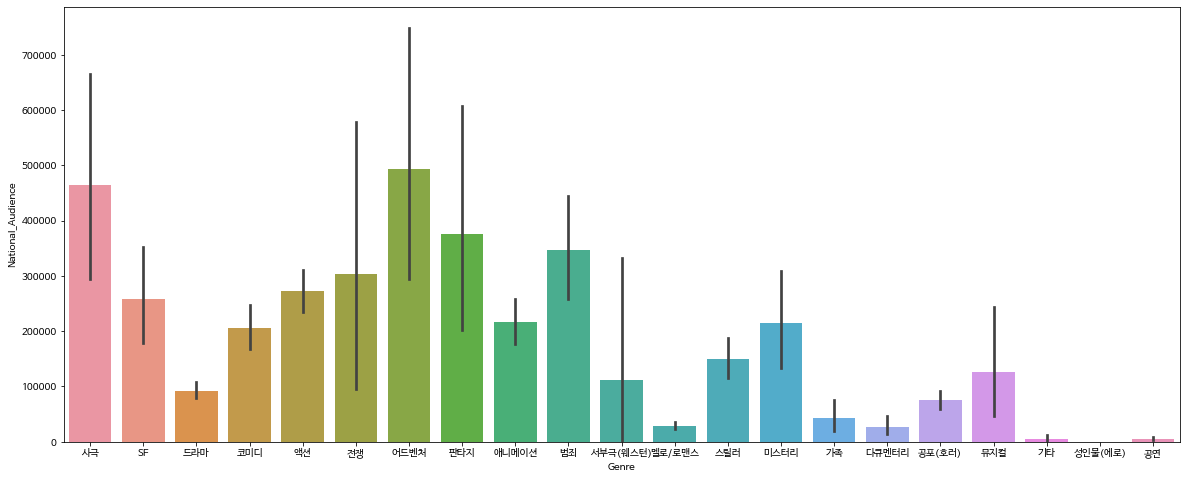

In [ ]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(20, 8))
fig = sns.barplot(x=data['Genre'], y=data['National_Audience'])
plt.show()

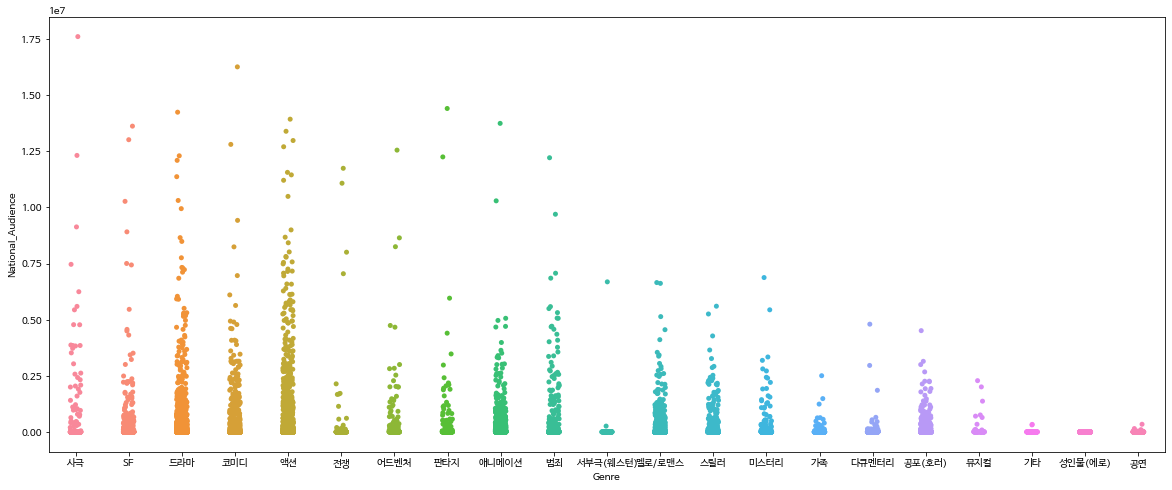

In [ ]:
# Audience by genre in every 5~10 years
fig, ax = plt.subplots(figsize=(20, 8))
fig = sns.stripplot(x=data['Genre'], y=data['National_Audience'])
plt.show()